In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print(" All libraries imported successfully")
print(f" Pandas version: {pd.__version__}")
print(f" NumPy version: {np.__version__}")

 All libraries imported successfully
 Pandas version: 2.2.2
 NumPy version: 2.0.2


In [ ]:
from google.colab import files

print(" Please upload your rainfall CSV file...")
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]
print(f" File '{filename}' uploaded successfully!")

 Please upload your rainfall CSV file...


Saving rainfall in india 1901-2015.csv to rainfall in india 1901-2015.csv
 File 'rainfall in india 1901-2015.csv' uploaded successfully!


In [ ]:
# Load the dataset
df = pd.read_csv(filename)

print(f"Dataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nFirst few rows:")
df.head()

Dataset Shape: (4116, 19)
Rows: 4116, Columns: 19

First few rows:


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [ ]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [ ]:
print(df.columns.tolist())

['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']


In [ ]:
missing = df.isnull().sum()
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Percentage': (missing.values / len(df)) * 100
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
    print(f"\nTotal missing values: {missing.sum()}")
else:
    print("No missing values found!")

,Column,Missing_Count,Percentage
14,ANNUAL,26,0.631681
18,Oct-Dec,13,0.315841
12,NOV,11,0.267250
17,Jun-Sep,10,0.242954
13,DEC,10,0.242954
16,Mar-May,9,0.218659
8,JUL,7,0.170068
11,OCT,7,0.170068
4,MAR,6,0.145773
15,Jan-Feb,6,0.145773



Total missing values: 134


In [ ]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage: {(duplicates/len(df))*100:.2f}%")
else:
    print(" No duplicates found!")

Duplicate rows: 0
 No duplicates found!


In [ ]:
df_processed = df.copy()

# Impute missing values with mean
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_processed[col].isnull().sum() > 0:
        mean_value = df_processed[col].mean()
        df_processed[col].fillna(mean_value, inplace=True)
        print(f" Imputed {col} with mean: {mean_value:.2f}")

print(f"\n Remaining missing values: {df_processed.isnull().sum()}")

 Imputed JAN with mean: 18.96
 Imputed FEB with mean: 21.81
 Imputed MAR with mean: 27.36
 Imputed APR with mean: 43.13
 Imputed MAY with mean: 85.75
 Imputed JUN with mean: 230.23
 Imputed JUL with mean: 347.21
 Imputed AUG with mean: 290.26
 Imputed SEP with mean: 197.36
 Imputed OCT with mean: 95.51
 Imputed NOV with mean: 39.87
 Imputed DEC with mean: 18.87
 Imputed ANNUAL with mean: 1411.01
 Imputed Jan-Feb with mean: 40.75
 Imputed Mar-May with mean: 155.90
 Imputed Jun-Sep with mean: 1064.72
 Imputed Oct-Dec with mean: 154.10

 Remaining missing values: SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64


In [ ]:

#removed duplicates
initial_shape = df_processed.shape[0]
df_processed = df_processed.drop_duplicates()
removed = initial_shape - df_processed.shape[0]

print(f" Removed {removed} duplicate rows")
print(f" Final dataset shape: {df_processed.shape}")

 Removed 0 duplicate rows
 Final dataset shape: (4116, 19)


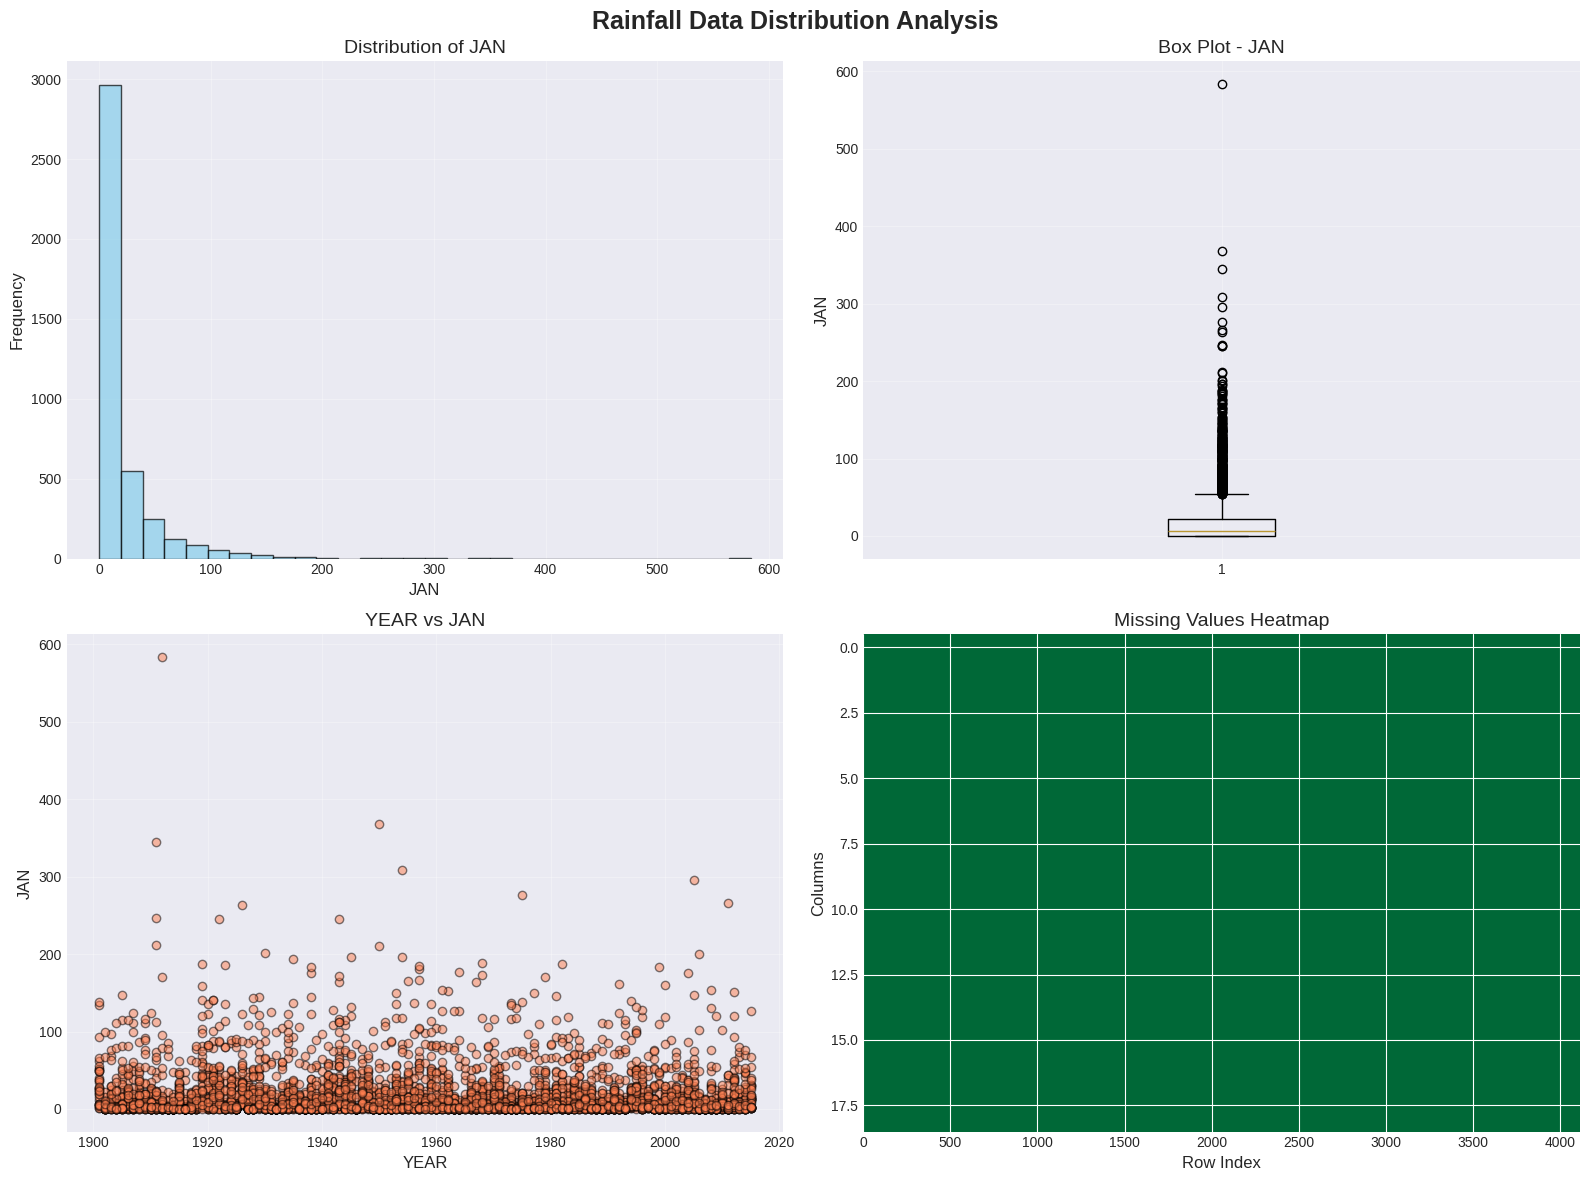

 Distribution analysis complete!


In [ ]:
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Rainfall Data Distribution Analysis', fontsize=18, fontweight='bold')

if len(numeric_cols) >= 1:
    col_to_plot = numeric_cols[1] if len(numeric_cols) > 1 else numeric_cols[0]

    axes[0, 0].hist(df_processed[col_to_plot].dropna(), bins=30,
                    edgecolor='black', alpha=0.7, color='skyblue')
    axes[0, 0].set_title(f'Distribution of {col_to_plot}', fontsize=14)
    axes[0, 0].set_xlabel(col_to_plot, fontsize=12)
    axes[0, 0].set_ylabel('Frequency', fontsize=12)
    axes[0, 0].grid(True, alpha=0.3)

    # Box plot
    axes[0, 1].boxplot(df_processed[col_to_plot].dropna())
    axes[0, 1].set_title(f'Box Plot - {col_to_plot}', fontsize=14)
    axes[0, 1].set_ylabel(col_to_plot, fontsize=12)
    axes[0, 1].grid(True, alpha=0.3)

    if len(numeric_cols) >= 2:
    # Scatter plot
     axes[1, 0].scatter(df_processed[numeric_cols[0]],
                      df_processed[numeric_cols[1]],
                      alpha=0.5, c='coral', edgecolors='black')
    axes[1, 0].set_title(f'{numeric_cols[0]} vs {numeric_cols[1]}', fontsize=14)
    axes[1, 0].set_xlabel(numeric_cols[0], fontsize=12)
    axes[1, 0].set_ylabel(numeric_cols[1], fontsize=12)
    axes[1, 0].grid(True, alpha=0.3)

# Missing values heatmap
axes[1, 1].imshow(df_processed.isnull().T, cmap='RdYlGn_r',
                  aspect='auto', interpolation='none')
axes[1, 1].set_title('Missing Values Heatmap', fontsize=14)
axes[1, 1].set_xlabel('Row Index', fontsize=12)
axes[1, 1].set_ylabel('Columns', fontsize=12)

plt.tight_layout()
plt.savefig('distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Distribution analysis complete!")


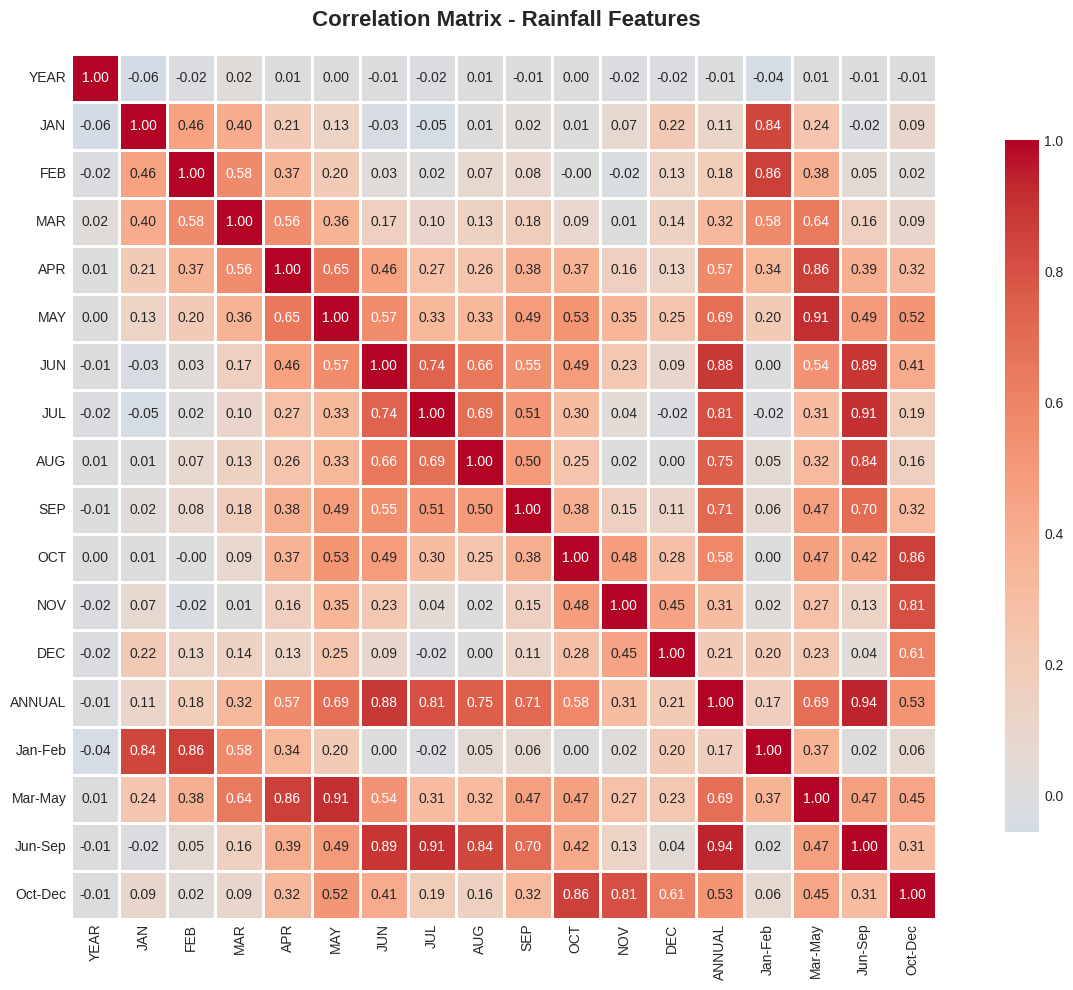

Correlation matrix complete!


In [19]:
# Correlation Matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df_processed[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title(' Correlation Matrix - Rainfall Features',
         fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation matrix complete!")

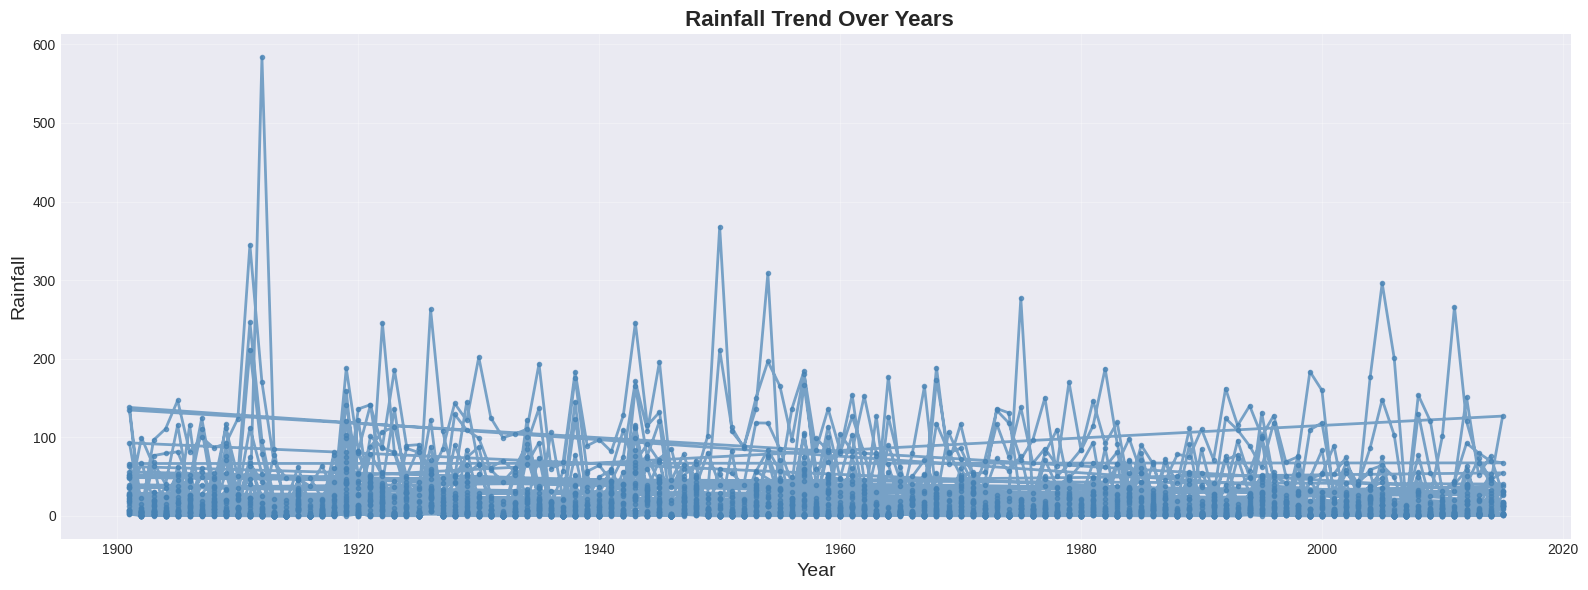

Time series plot complete!


In [21]:
# Time Series Plot (if year column exists)
year_cols = [col for col in df_processed.columns if 'year' in col.lower()]
if year_cols and len(numeric_cols) > 1:
    plt.figure(figsize=(16, 6))
    col_to_plot = [c for c in numeric_cols if c not in year_cols][0]
    plt.plot(df_processed[year_cols[0]], df_processed[col_to_plot],
             linewidth=2, marker='o', markersize=3, alpha=0.7, color='steelblue')
    plt.title(' Rainfall Trend Over Years', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Rainfall', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('time_series.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Time series plot complete!")
else:
    print(" No year column found for time series plot")

In [22]:
# Define features and target
# 🔧 CUSTOMIZE THESE FOR YOUR DATASET:
target_col = 'ANNUAL'  # Change this to your target column
feature_cols = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']  # Change these to your feature columns

print("="*80)
print("🎯 FEATURE PREPARATION")
print("="*80)

# Verify columns exist
available_cols = df_processed.columns.tolist()
print(f"Available columns: {available_cols}\n")

# Filter to only use available columns
feature_cols = [col for col in feature_cols if col in available_cols]

if target_col not in available_cols:
    print(f"⚠️ Target column '{target_col}' not found!")
    print("Available numeric columns:", [col for col in available_cols if col in numeric_cols])
else:
    X = df_processed[feature_cols]
    y = df_processed[target_col]

    print(f"✅ Features shape: {X.shape}")
    print(f"✅ Target shape: {y.shape}")
    print(f"\nFeature columns: {feature_cols}")
    print(f"Target column: {target_col}")

🎯 FEATURE PREPARATION
Available columns: ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']

✅ Features shape: (4116, 12)
✅ Target shape: (4116,)

Feature columns: ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
Target column: ANNUAL


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(" Features scaled using StandardScaler")
print(f"Mean (first 3): {scaler.mean_[:3]}")
print(f"Std (first 3): {scaler.scale_[:3]}")

 Features scaled using StandardScaler
Mean (first 3): [18.95732004 21.80532458 27.35919708]
Std (first 3): [33.56496565 35.89203479 46.91947532]


In [27]:
# Split data
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"\n Train set: {X_train_80.shape[0]} samples")
print(f" Test set: {X_test_80.shape[0]} samples")

# Train model
model_80 = LinearRegression()
model_80.fit(X_train_80, y_train_80)

# Predictions
y_train_pred_80 = model_80.predict(X_train_80)
y_test_pred_80 = model_80.predict(X_test_80)

print("\n Model trained successfully!")
print(f"Intercept: {model_80.intercept_:.4f}")
print(f"Coefficients shape: {model_80.coef_.shape}")


 Train set: 3292 samples
 Test set: 824 samples

 Model trained successfully!
Intercept: 1409.9368
Coefficients shape: (12,)


In [28]:
# Calculate metrics
train_mae_80 = mean_absolute_error(y_train_80, y_train_pred_80)
train_mse_80 = mean_squared_error(y_train_80, y_train_pred_80)
train_rmse_80 = np.sqrt(train_mse_80)
train_r2_80 = r2_score(y_train_80, y_train_pred_80)

test_mae_80 = mean_absolute_error(y_test_80, y_test_pred_80)
test_mse_80 = mean_squared_error(y_test_80, y_test_pred_80)
test_rmse_80 = np.sqrt(test_mse_80)
test_r2_80 = r2_score(y_test_80, y_test_pred_80)


print("\n TRAINING SET:")
print(f"   MAE:  {train_mae_80:.4f}")
print(f"   MSE:  {train_mse_80:.4f}")
print(f"   RMSE: {train_rmse_80:.4f}")
print(f"   R²:   {train_r2_80:.4f}")

print("\n TESTING SET:")
print(f"   MAE:  {test_mae_80:.4f}")
print(f"   MSE:  {test_mse_80:.4f}")
print(f"   RMSE: {test_rmse_80:.4f}")
print(f"   R²:   {test_r2_80:.4f}")


 TRAINING SET:
   MAE:  20.0654
   MSE:  12478.0201
   RMSE: 111.7051
   R²:   0.9843

 TESTING SET:
   MAE:  16.1569
   MSE:  2280.1583
   RMSE: 47.7510
   R²:   0.9974


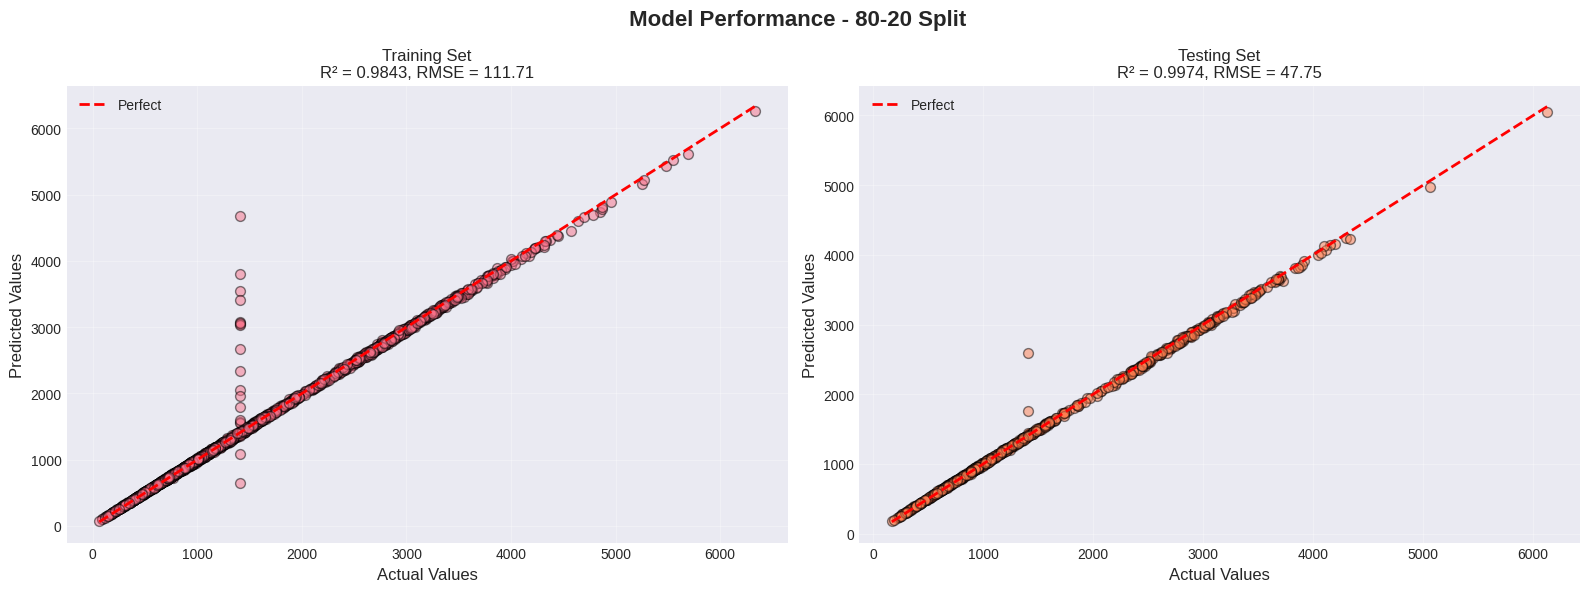

 Prediction visualization complete!


In [29]:
# Visualize predictions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(' Model Performance - 80-20 Split', fontsize=16, fontweight='bold')

# Training set
axes[0].scatter(y_train_80, y_train_pred_80, alpha=0.5, edgecolors='black', s=50)
axes[0].plot([y_train_80.min(), y_train_80.max()],
             [y_train_80.min(), y_train_80.max()], 'r--', lw=2, label='Perfect')
axes[0].set_xlabel('Actual Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title(f'Training Set\nR² = {train_r2_80:.4f}, RMSE = {train_rmse_80:.2f}', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing set
axes[1].scatter(y_test_80, y_test_pred_80, alpha=0.5, color='coral',
               edgecolors='black', s=50)
axes[1].plot([y_test_80.min(), y_test_80.max()],
             [y_test_80.min(), y_test_80.max()], 'r--', lw=2, label='Perfect')
axes[1].set_xlabel('Actual Values', fontsize=12)
axes[1].set_ylabel('Predicted Values', fontsize=12)
axes[1].set_title(f'Testing Set\nR² = {test_r2_80:.4f}, RMSE = {test_rmse_80:.2f}', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('predictions_80_20.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Prediction visualization complete!")

In [32]:
# Split data
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

print(f"\n Train set: {X_train_70.shape[0]} samples")
print(f"Test set: {X_test_70.shape[0]} samples")

# Train model
model_70 = LinearRegression()
model_70.fit(X_train_70, y_train_70)

# Predictions
y_train_pred_70 = model_70.predict(X_train_70)
y_test_pred_70 = model_70.predict(X_test_70)

print("\n Model trained successfully!")


 Train set: 2881 samples
Test set: 1235 samples

 Model trained successfully!


In [33]:
# Calculate metrics
train_mae_70 = mean_absolute_error(y_train_70, y_train_pred_70)
train_mse_70 = mean_squared_error(y_train_70, y_train_pred_70)
train_rmse_70 = np.sqrt(train_mse_70)
train_r2_70 = r2_score(y_train_70, y_train_pred_70)

test_mae_70 = mean_absolute_error(y_test_70, y_test_pred_70)
test_mse_70 = mean_squared_error(y_test_70, y_test_pred_70)
test_rmse_70 = np.sqrt(test_mse_70)
test_r2_70 = r2_score(y_test_70, y_test_pred_70)

print("="*80)
print("MODEL PERFORMANCE - 70-30 SPLIT")
print("="*80)

print("\n TRAINING SET:")
print(f"   MAE:  {train_mae_70:.4f}")
print(f"   MSE:  {train_mse_70:.4f}")
print(f"   RMSE: {train_rmse_70:.4f}")
print(f"   R²:   {train_r2_70:.4f}")

print("\n TESTING SET:")
print(f"   MAE:  {test_mae_70:.4f}")
print(f"   MSE:  {test_mse_70:.4f}")
print(f"   RMSE: {test_rmse_70:.4f}")
print(f"   R²:   {test_r2_70:.4f}")

MODEL PERFORMANCE - 70-30 SPLIT

 TRAINING SET:
   MAE:  22.6143
   MSE:  14186.4224
   RMSE: 119.1068
   R²:   0.9822

 TESTING SET:
   MAE:  17.3588
   MSE:  1779.7604
   RMSE: 42.1872
   R²:   0.9979


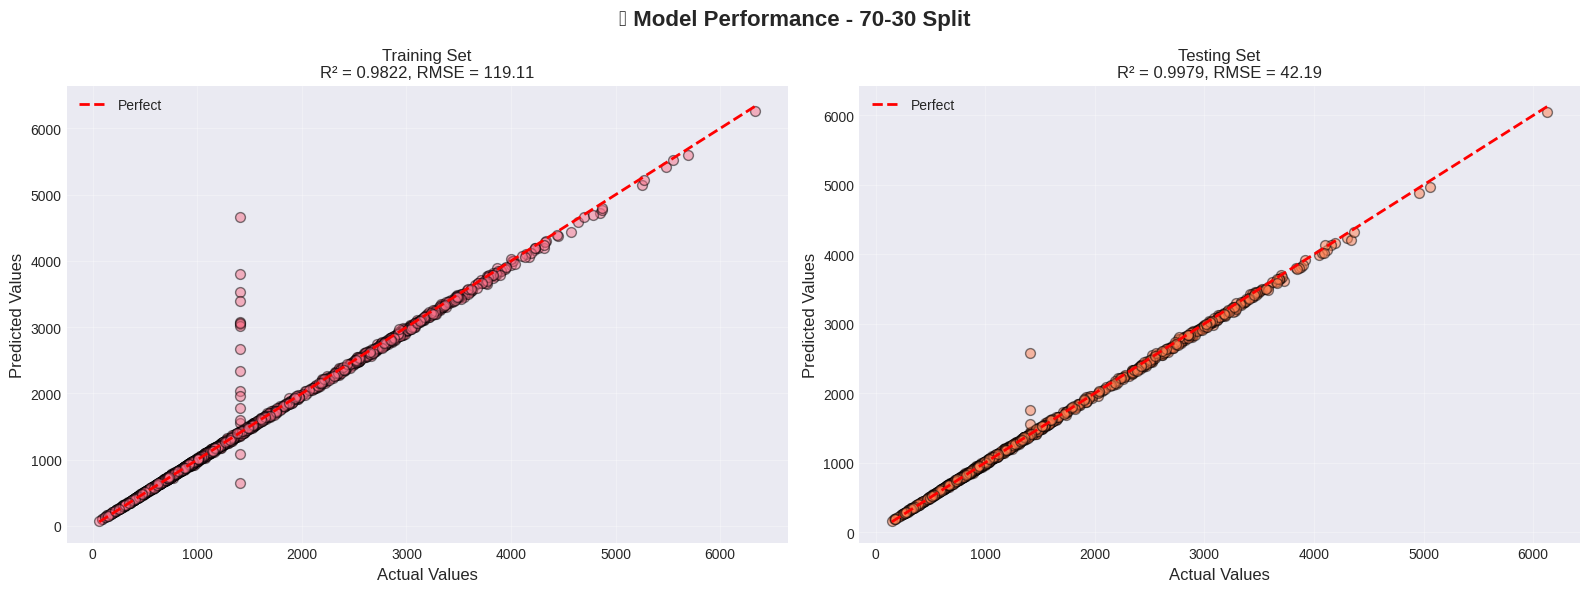

✅ Prediction visualization complete!


In [34]:
# Visualize predictions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('🎯 Model Performance - 70-30 Split', fontsize=16, fontweight='bold')

# Training set
axes[0].scatter(y_train_70, y_train_pred_70, alpha=0.5, edgecolors='black', s=50)
axes[0].plot([y_train_70.min(), y_train_70.max()],
             [y_train_70.min(), y_train_70.max()], 'r--', lw=2, label='Perfect')
axes[0].set_xlabel('Actual Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title(f'Training Set\nR² = {train_r2_70:.4f}, RMSE = {train_rmse_70:.2f}', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing set
axes[1].scatter(y_test_70, y_test_pred_70, alpha=0.5, color='coral',
               edgecolors='black', s=50)
axes[1].plot([y_test_70.min(), y_test_70.max()],
             [y_test_70.min(), y_test_70.max()], 'r--', lw=2, label='Perfect')
axes[1].set_xlabel('Actual Values', fontsize=12)
axes[1].set_ylabel('Predicted Values', fontsize=12)
axes[1].set_title(f'Testing Set\nR² = {test_r2_70:.4f}, RMSE = {test_rmse_70:.2f}', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('predictions_70_30.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Prediction visualization complete!")

In [35]:
# Create comparison DataFrame
comparison = pd.DataFrame({
    'Split': ['80-20', '70-30'],
    'Train_MAE': [train_mae_80, train_mae_70],
    'Test_MAE': [test_mae_80, test_mae_70],
    'Train_RMSE': [train_rmse_80, train_rmse_70],
    'Test_RMSE': [test_rmse_80, test_rmse_70],
    'Train_R2': [train_r2_80, train_r2_70],
    'Test_R2': [test_r2_80, test_r2_70]
})

print("="*80)
print(" MODEL PERFORMANCE COMPARISON")
print("="*80)
display(comparison)

# Save to CSV
comparison.to_csv('model_comparison.csv', index=False)
print("\nComparison saved to 'model_comparison.csv'")

 MODEL PERFORMANCE COMPARISON


,Split,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,Train_R2,Test_R2
0,80-20,20.065352,16.156932,111.705059,47.751003,0.984309,0.997394
1,70-30,22.614327,17.358843,119.106769,42.187207,0.982160,0.997903



Comparison saved to 'model_comparison.csv'
